##### 입력데이터 날짜 확인 및 데이터 프레임 변환 함수 코드

In [76]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [77]:
# 데이터 읽어 들이기 ("base data를 예시로 사용하였습니다. 원하시는 데이터의 경로를 입력하세요.")
data = pd.read_excel('/home/augustine77/mylab/sim/sim/05_SVU_SCT_FIN/Model/BIVA/Base_data/dataset_03_M.xlsx')
# csv 파일이라면
# data = pd.read_csv('/home/augustine77/mylab/sim/sim/05_SVU_SCT_FIN/Model/BIVA/Base_data/dataset_03_M.csv')

# 읽어 들인 데이터 시작 날짜 확인 위해 데이터 앞부부분 확인
print(f"읽어 들인 데이터의 시작점 데이터 \n {data.head(3)} \n")
# 읽어 들인 데이터의 마지막 잘짜 확인 위해 데이터 뒷부분 확인
print(f"읽어 들인 데이터의 끝나는점 데이터 \n{data.tail(3)} \n")

print(f"데이터에 크기 모양 : \n {data.shape}")

# 예시 데이터 (dataset_03_M.xlsx) 의 시작 일은 "1970-01-01" 마지막 일 "2023-06-01"
# 월간 데이터 임을 확인.


읽어 들인 데이터의 시작점 데이터 
         date     B7     B8  C9  C10  C11  C12  D13  D14  D15  ...  N93  O94  \
0 1970-01-01  101.0  100.6 NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1 1970-02-01  100.9  101.5 NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2 1970-03-01  100.8  101.9 NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

   O95  O96  O97  O98  O99  O100  O101  O102  
0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
1  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  
2  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  

[3 rows x 97 columns] 

읽어 들인 데이터의 끝나는점 데이터 
          date    B7    B8     C9    C10       C11    C12   D13    D14    D15  \
639 2023-04-01  98.0  99.9  109.8  102.9  103.3226  115.4  96.2  125.4  100.1   
640 2023-05-01   NaN   NaN    NaN    NaN       NaN    NaN   NaN    NaN    NaN   
641 2023-06-01   NaN   NaN    NaN    NaN       NaN    NaN   NaN    NaN    NaN   

     ...  N93           O94           O95           O96           O97  \
639  ...  NaN  1.959187e+12  1

In [80]:
# 빈 데이터 날짜 확인을 위한 함수 
def makeTimeIndex (start:str, end:str, data:DataFrame, idxCol, freq, how):
    tiRange = pd.date_range(start=start,end=end, freq=freq, tz='Asia/Seoul',name=idxCol).strftime("%Y-%m-%d")
    tiRange = pd.to_datetime(tiRange)
    tidf = DataFrame(index=tiRange)
    data[idxCol] = pd.to_datetime(data[idxCol])
    ndata = data.rename(columns={str(idxCol):'date'}, inplace=False)
    ndata = ndata.set_index('date')
    df = pd.merge(tidf, ndata, left_index=True, right_index=True, how=how)
    return df

In [78]:
# start = "1970-01-01" # 읽어 들인 데이터의 시작 시점
start = "2010-01-01"
# end = "2023-06-01" # 읽어 들인 데이터의 끝 시점
end = "2025-06-03"   # 생각하는 데이터의 끝 지점 입력
freq = "MS" # 월:"M"  일:"D" 분기:"Q"
idxCol = "date" # 시계열 컬럼
how = 'left' # inner, outer 직접 옵션마다 데이터의 길이를 밑에 그래프로 확인하세요

df = makeTimeIndex(start=start, end=end, data=data, idxCol=idxCol, freq=freq, how=how)
df

,B7,B8,C9,C10,C11,C12,D13,D14,D15,E16,...,N93,O94,O95,O96,O97,O98,O99,O100,O101,O102
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,102.5,99.2,82.1,82.7,87.4388,82.4,83.623,61.470,111.102,76.4,...,1.702768,8.547816e+11,8.802278e+09,1.185536e+11,8.500608e+10,1.704226e+10,6.095032e+10,1.036660e+09,2.718964e+07,2.687389e+07
2010-02-01,102.4,99.7,84.1,83.1,85.2259,83.7,84.245,63.482,112.449,79.1,...,1.482842,8.796157e+11,8.368467e+09,1.027708e+11,8.772695e+10,1.583804e+10,4.553971e+10,1.041465e+09,3.398199e+07,3.279517e+07
2010-03-01,102.1,100.1,84.5,84.6,86.0250,83.8,86.377,63.497,113.355,77.2,...,1.569334,9.054103e+11,9.092036e+09,1.031763e+11,8.781290e+10,1.640028e+10,4.729794e+10,1.057146e+09,3.595144e+07,3.542907e+07
2010-04-01,101.9,100.3,83.9,85.7,81.2972,83.6,88.067,64.760,113.182,76.8,...,1.588108,8.965858e+11,8.188756e+09,1.038884e+11,8.941426e+10,1.236785e+10,3.481603e+10,1.061795e+09,4.248468e+07,4.231917e+07
2010-05-01,101.9,100.7,85.2,86.3,84.4581,84.9,89.044,64.433,112.889,77.5,...,1.581573,8.901042e+11,7.506782e+09,1.129730e+11,8.529783e+10,1.338018e+10,3.990807e+10,1.070358e+09,4.052239e+07,4.032287e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


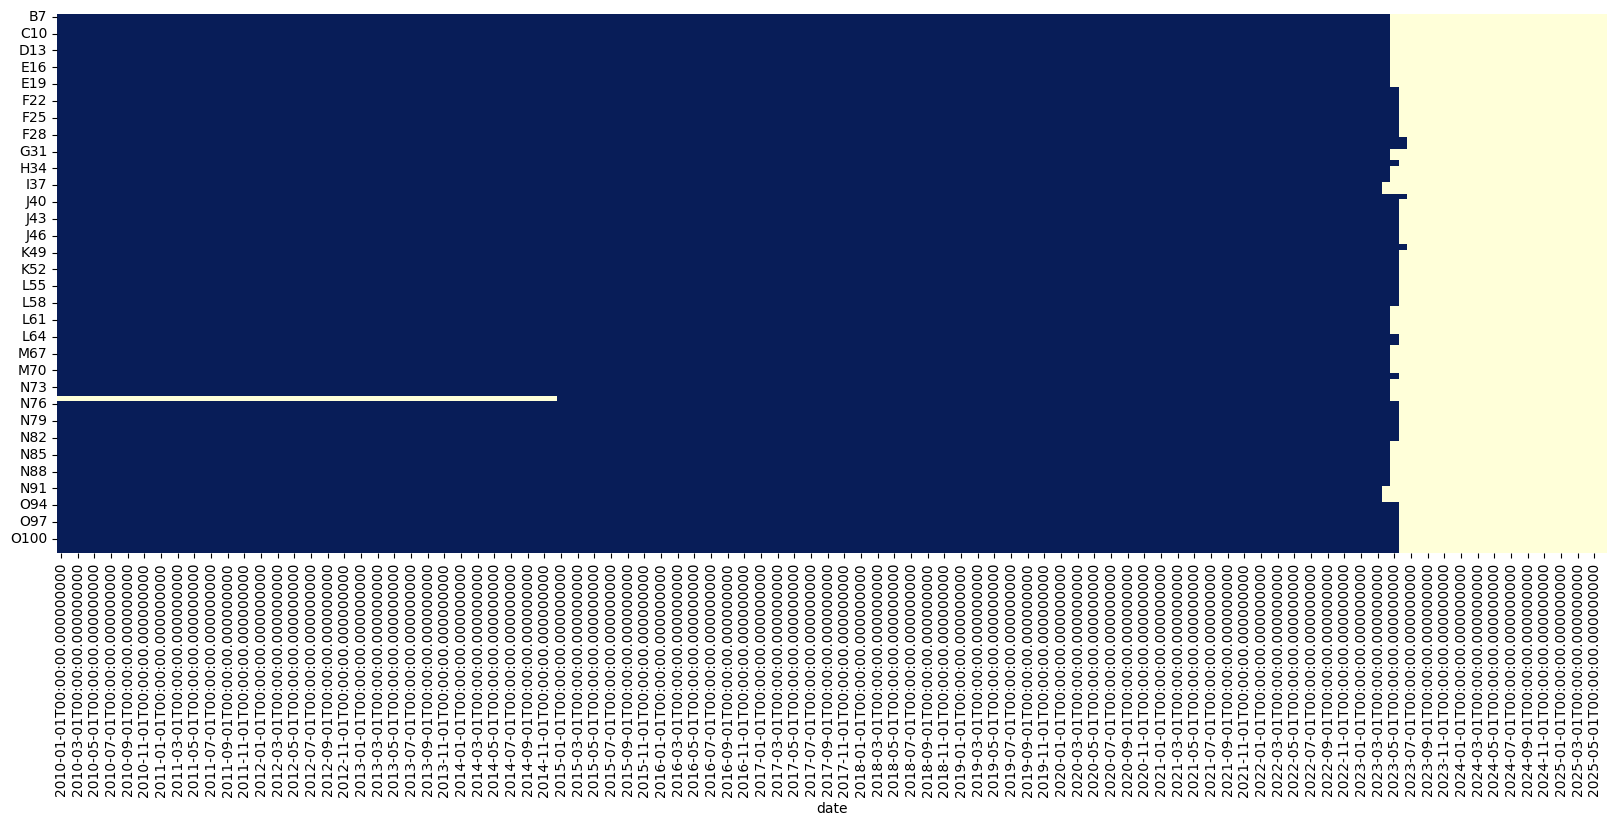

In [79]:
# 파란색 부분이 데이터가 있는 부분 연파스텔 노랑 색이 데이터가 없는 부분입니다.
plt.figure(figsize=(20, 7))
ax = sns.heatmap(df.notna().T, cbar=False, cmap="YlGnBu", annot=False, fmt=".1f")


###### 추가 샘플 코드

- 미분양주택현황 (전국) 데이터를 ECOS(한국은행통계시스템)에서 새로 받았습니다.
- 엑셀 데이터보다 csv 파일로 다운로드 받으시는 것이 읽어 들이기 쉬우실 것 같습니다.
- 다만 ECOS 에서 컬럼 정보 (단위 등) 를 미리 확인하셔야 합니다.\
     (엑셀자료에는 주석 sheet에 정보가 있지만 pandas 버전에나 시스템에 따라 엑셀 파일을 읽어 들이는데 문제가 있는 것 같습니다.)

In [92]:
# 저는 csv 자료를 다운 받았습니다.

filePath = "/home/augustine77/mylab/sim/sim/05_SVU_SCT_FIN/Model/BIVA_bak01/Base_data/rawData/미분양주택현황_03225410.csv"
data_i = pd.read_csv(filePath)
data_i

,변환,원자료
0,2007/01,"75,616.00"
1,2007/02,"73,619.00"
2,2007/03,"73,162.00"
3,2007/04,"73,393.00"
4,2007/05,"78,571.00"
...,...,...
214,2024/11,"65,146.00"
215,2024/12,"70,173.00"
216,2025/01,"72,624.00"
217,2025/02,"70,061.00"


In [93]:
# start = "2007-01-01" # 읽어 들인 데이터의 시작 시점
start = "2006-01-01"
# end = "2025-03-01" # 읽어 들인 데이터의 끝 시점
end = "2025-06-03"   # 생각하는 데이터의 끝 지점 입력
freq = "MS" # 월:"M"  일:"D" 분기:"Q"
idxCol = "변환" # 시계열 컬럼
how = 'left' # inner, outer 직접 옵션마다 데이터의 길이를 밑에 그래프로 확인하세요

df_i = makeTimeIndex(start=start, end=end, data=data_i, idxCol=idxCol, freq=freq, how=how)
df_i

,원자료
변환,
2006-01-01,NaN
2006-02-01,NaN
2006-03-01,NaN
2006-04-01,NaN
2006-05-01,NaN
...,...
2025-02-01,"70,061.00"
2025-03-01,"68,920.00"
2025-04-01,NaN


- 한글 컬럼 때문에 문제가 있네요.  강제로 컬럼 이름을 변경해 보았습니다.

In [98]:
data_i.columns = ['date','value']
idxCol = "date" # 시계열 컬럼
df_i = makeTimeIndex(start=start, end=end, data=data_i, idxCol=idxCol, freq=freq, how=how)
df_i

,value
date,
2006-01-01,NaN
2006-02-01,NaN
2006-03-01,NaN
2006-04-01,NaN
2006-05-01,NaN
...,...
2025-02-01,"70,061.00"
2025-03-01,"68,920.00"
2025-04-01,NaN


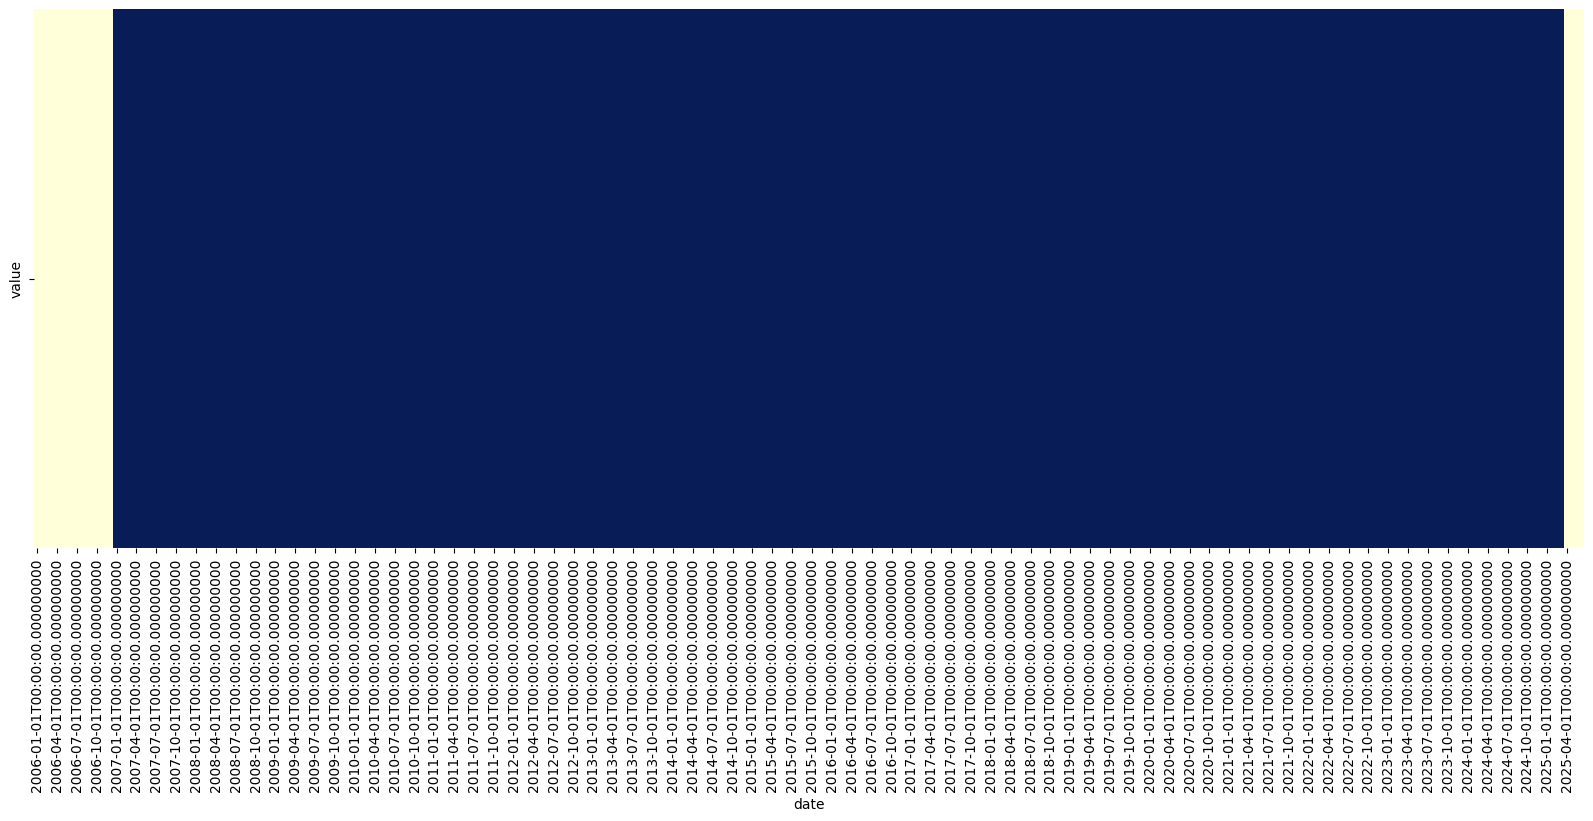

In [99]:
# 파란색 부분이 데이터가 있는 부분 연파스텔 노랑 색이 데이터가 없는 부분입니다.
plt.figure(figsize=(20, 7))
ax = sns.heatmap(df_i.notna().T, cbar=False, cmap="YlGnBu", annot=False, fmt=".1f")